In [1]:
# 데이터 준비 
import pandas as pd
import numpy as np

samsung_data = pd.read_csv('samsung.csv', encoding='cp949', thousands=',')
samsung_data = pd.DataFrame(samsung_data).sort_index(ascending=False)

del(samsung_data['일자'])
samsung = np.array(samsung_data)

samsung_target = pd.read_excel('samsung0206.xlsx', encoding='cp949', thousands=',')
samsung_target = pd.DataFrame(samsung_target).sort_index(ascending=False)

del(samsung_target['Unnamed: 0'])
predict = np.array(samsung_target)

# 데이터 셋 준비
x = []
y = []

# print(samsung_data.iloc[1:6, :], samsung_data.iloc[6,3])  >>> 예시
for i in range(1, len(samsung)-4, +1):
    x_tmp = samsung[i:i+4, :]   # (5행 5열 데이터 뽑아서 넣어줘)
    y_tmp = samsung[i+4, 3]     # x데이터 바로 다음 행의 종가 데이터 알려줘
    
    x.append(x_tmp)
    y.append(y_tmp)
########################################################################
x = np.array(x)
y = np.array(y)

# Data split하기
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x, y,
                                                     test_size=0.4,
                                                     shuffle = False)
x_test, x_val , y_test, y_val = train_test_split(x_test, y_test,
                                                     test_size=0.5,
                                                     shuffle = False)

In [2]:
print(x_train.shape, x_test.shape, x_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(252, 4, 5) (84, 4, 5) (85, 4, 5)
(252,) (84,) (85,)


In [3]:
x_train = x_train.reshape(x_train.shape[0], 4*5)
x_test = x_test.reshape(x_test.shape[0], 4*5)
x_val = x_val.reshape(x_val.shape[0], 4*5)
predict = predict.reshape(1,4*5)

In [4]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
clf.fit(x_train, y_train)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [5]:
y_train_predict = clf.predict(x_train)
y_test_predict = clf.predict(x_test)
y_predict = clf.predict(predict)

from sklearn.metrics import mean_squared_error
print("훈련 MSE : {} , 테스트 MSE : {}".format(
    mean_squared_error(y_train, y_train_predict),
    mean_squared_error(y_test, y_test_predict)))

from sklearn.metrics import r2_score
print("훈련 R2 : {} , 테스트 R2 : {}".format(
    r2_score(y_train, y_train_predict),
    r2_score(y_test, y_test_predict)))

훈련 MSE : 10935396.825396825 , 테스트 MSE : 4425684.523809524
훈련 R2 : -0.31089550415346356 , 테스트 R2 : -0.4687774674412162


In [6]:
print("종가(test) : {}".format(y_test_predict[len(y_test_predict)-1]))
print("종가(pred) : {}".format(y_predict))    

종가(test) : 42600
종가(pred) : [45800]


In [7]:
y_test_predict[83]

42600

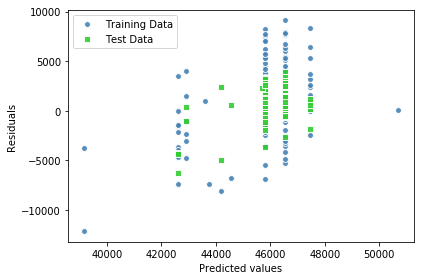

In [9]:
import matplotlib.pyplot as plt

# 트레이닝 모델
plt.scatter(y_train_predict,
            (y_train_predict-y_train),
            c='steelblue',
            edgecolors='white',
            marker='o',
            s=35,
            alpha=0.9,
            label="Training Data")
# 테스트 모델
plt.scatter(y_test_predict,
            (y_test_predict-y_test),
            c='limegreen',
            edgecolors='white',
            marker='s',
            s=35,
            alpha=0.9,
            label="Test Data")

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()